<a href="https://colab.research.google.com/github/RaviralaLathasri/ML-Models/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Kmeans :
import numpy as nm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Load the dataset
dataset = pd.read_csv("/content/Logistic_Iris.csv")
dataset.head(2)

,Sepal Length,Sepal Width,Petal Length,Peatal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [18]:
# Data Preparation
x = dataset.iloc[:, [0, 1, 2, 3]].values

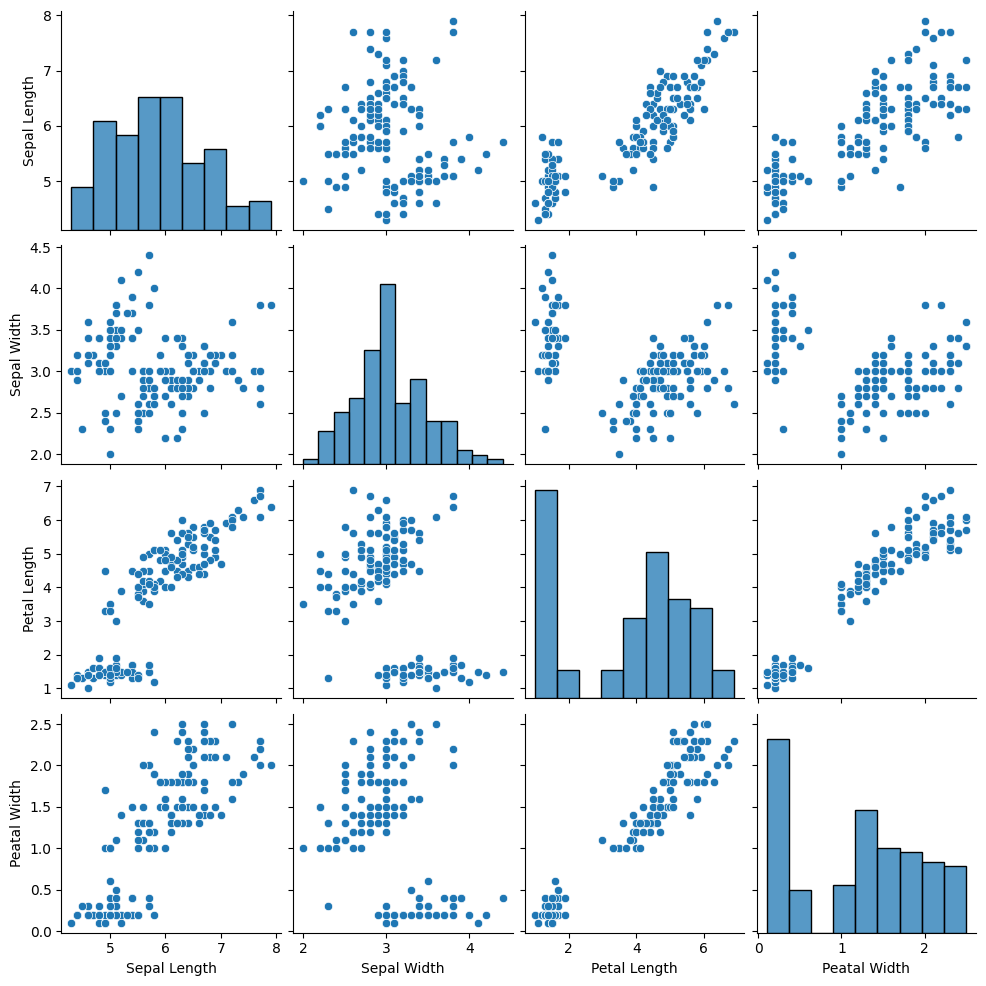

In [19]:
# Pairplot for visualizing relationships between variables
sns.pairplot(dataset)

In [20]:
 # Finding the optimum number of clusters for k-means classification
Elbow = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(x)
  Elbow.append(kmeans.inertia_)

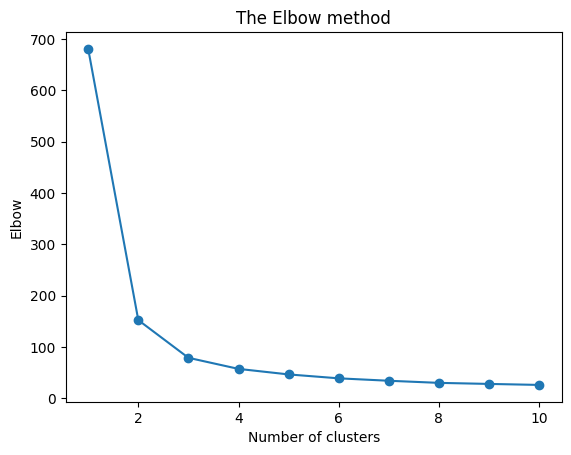

In [21]:
# Plotting the results onto a Line graph (Elbow Method)
plt.plot(range(1, 11), Elbow, marker='o')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Elbow')
plt.show()

In [22]:
 # K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

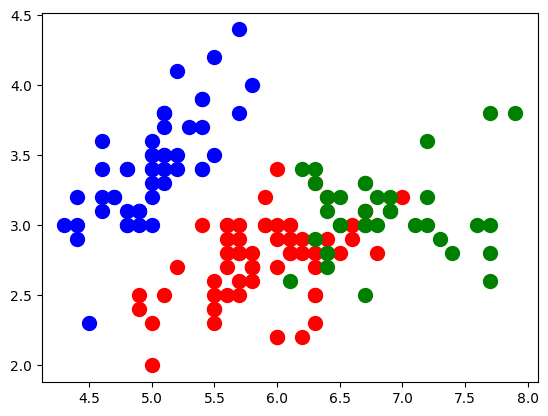

In [15]:
# Visualizing the Clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')

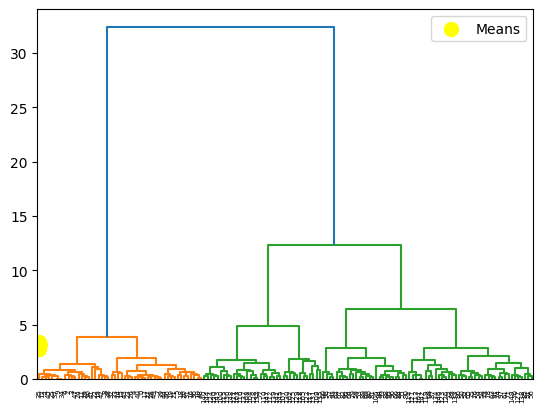

In [24]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Means')
plt.legend()
# Hierarchical Clustering and Dendrogram
distance_matrix = linkage(x, method='ward', metric='euclidean')
dn = dendrogram(distance_matrix)
# Display the dendrogram
plt.show()